In [24]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
import metapredict as meta
import protfasta 

metapredict_version = 3


## Synthetic folded proteins

The sequences below are taken from:


Pesce, F., Bremer, A., Tesei, G., Hopkins, J. B., Grace, C. R., Mittag, T. & Lindorff-Larsen, K. Design of intrinsically disordered protein variants with diverse structural properties. Sci. Adv. 10, eadm9926 (2024).
  


In [25]:
seqs = protfasta.read_fasta('data/pesce_seqs.fasta')

In [26]:
def plot_disorder(seq, outname):

    figure(num=None, figsize=(3, 1), dpi=300, facecolor='w', edgecolor='k')
    ax = plt.gca()

    d = meta.predict_disorder_domains(seq, version=metapredict_version)
    idx = np.arange(1,len(seq)+1)


    idr_scores = False
    for idr_b in d.disordered_domain_boundaries:
        idr_scores = d.disorder[idr_b[0]:idr_b[1]]
        idr_idx = np.arange(1+idr_b[0], idr_b[1]+1)


    if idr_scores is not False:
        plt.fill_between(idr_idx, idr_scores, color='r',alpha=0.4,linewidth=0)
    plt.xlim([idx[0], idx[-1]])

    plt.plot(idx, d.disorder,'k',linewidth=0.5)
    plt.plot(idx, d.disorder,'r',linewidth=0.3)
    plt.ylim([0,1])
    
    

    plt.tight_layout()
    print()
    plt.savefig(outname)

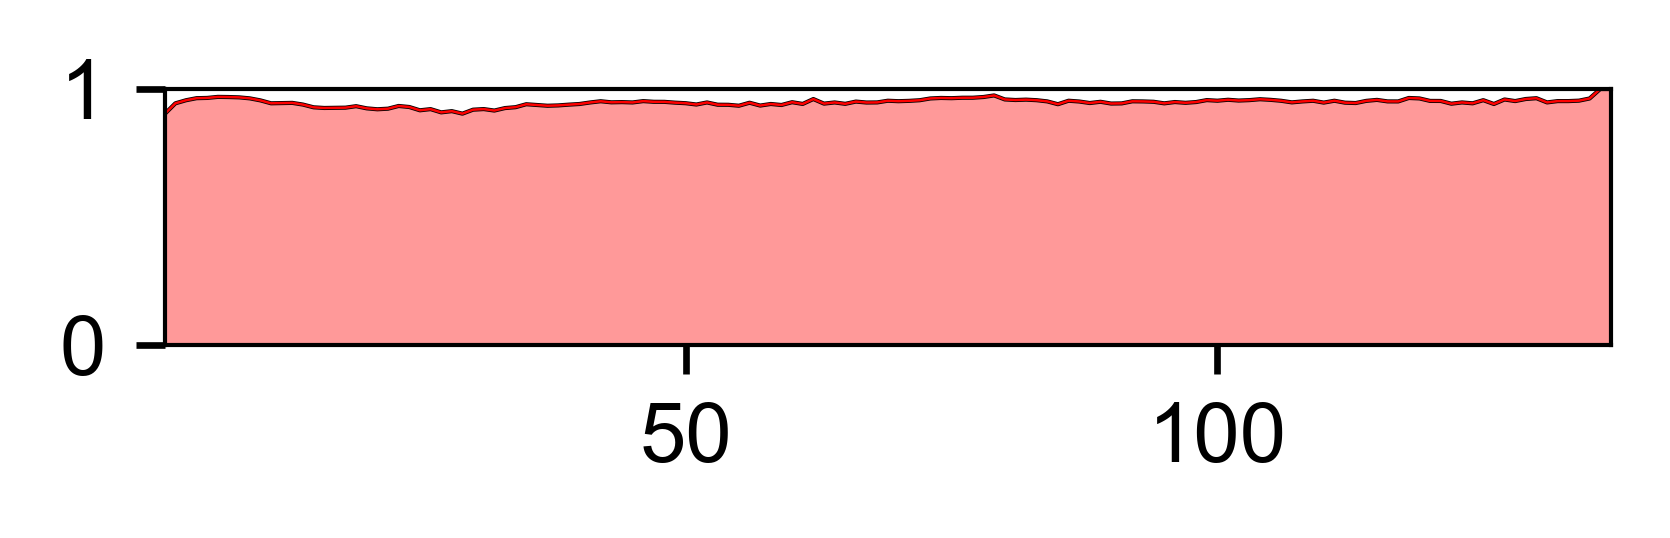

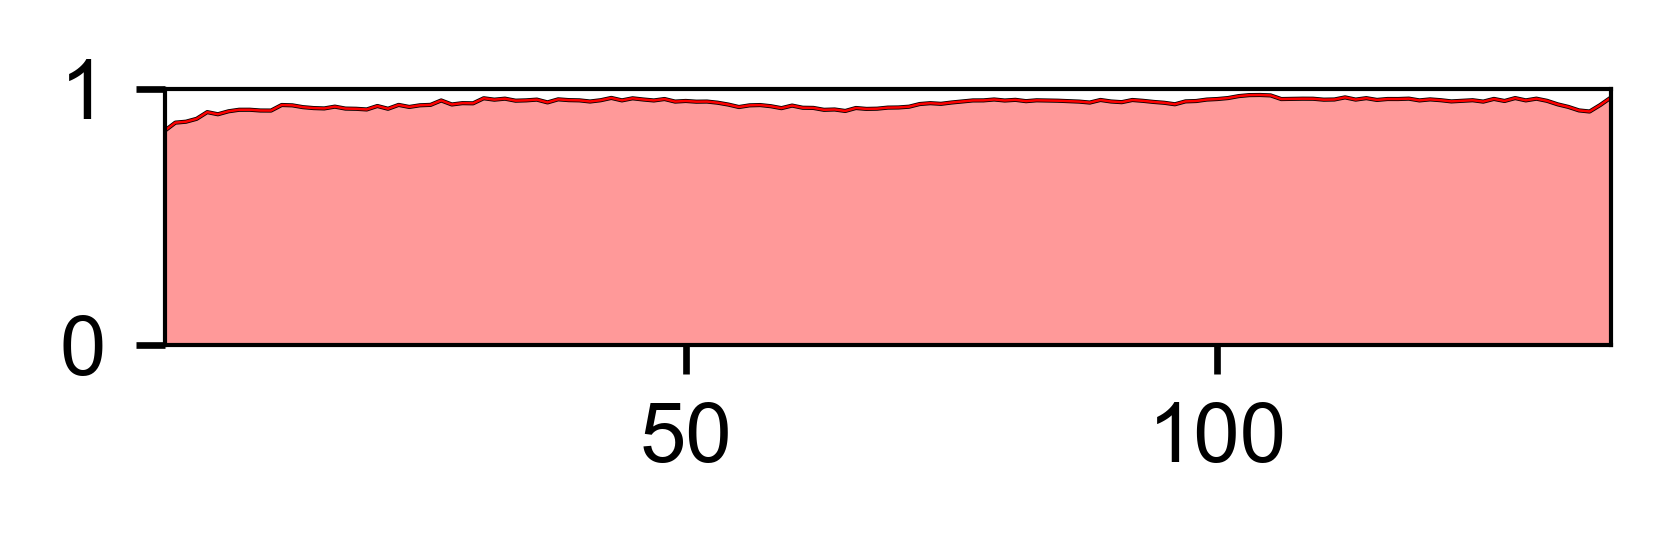

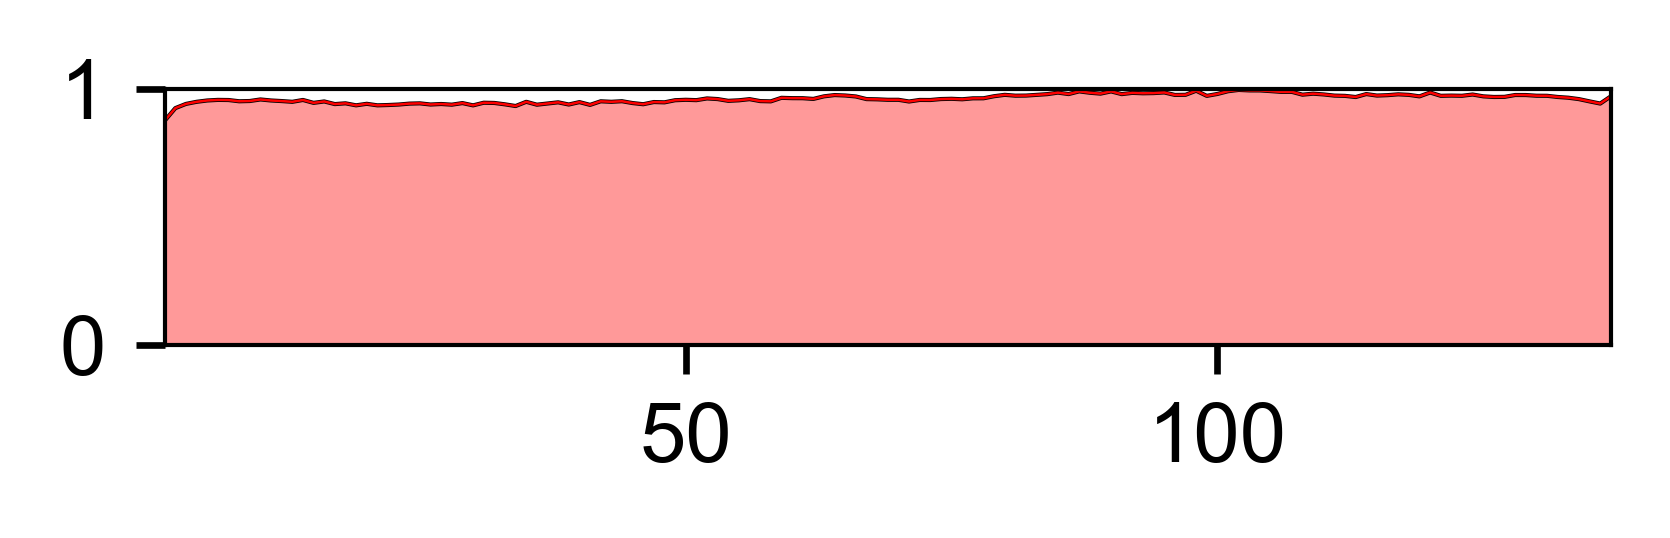

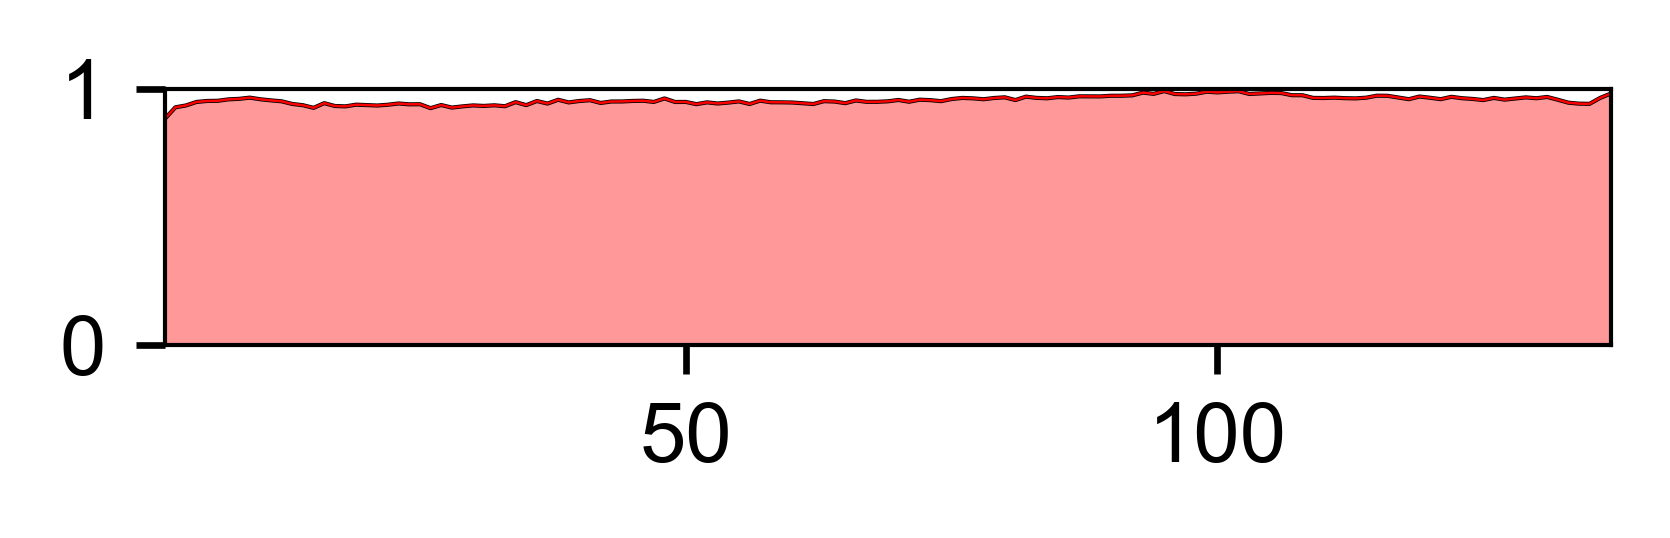

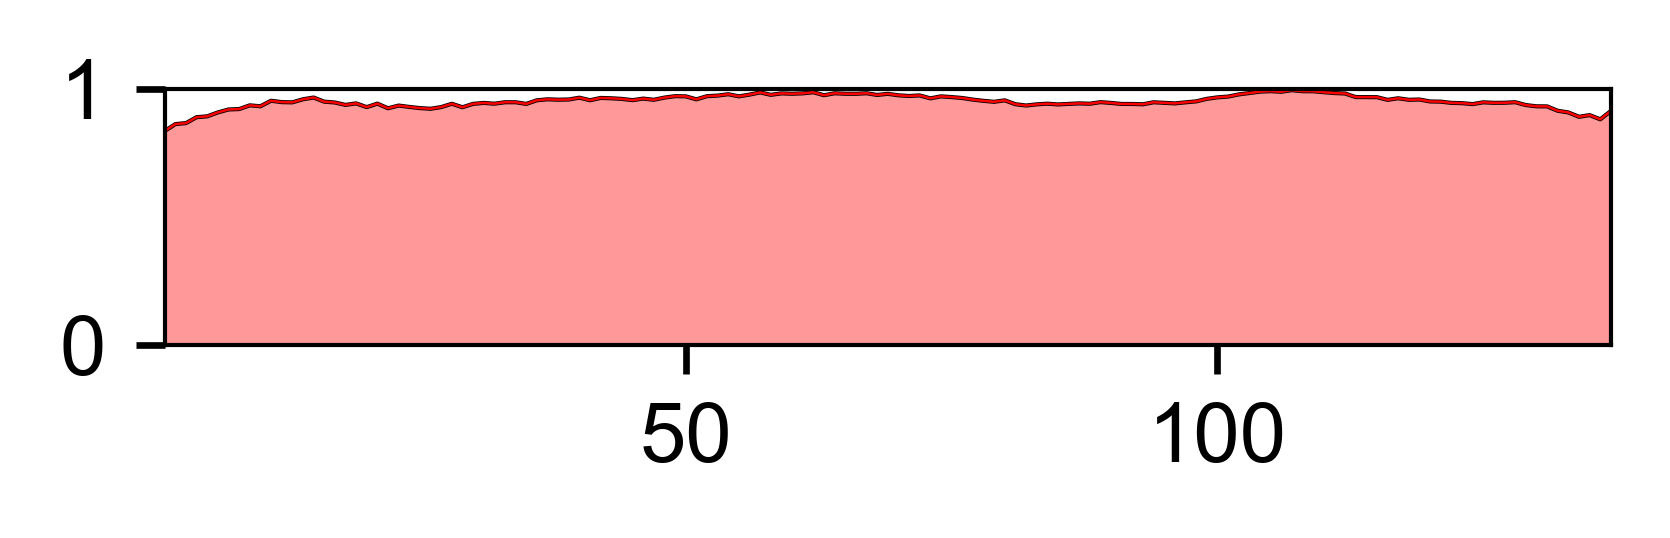

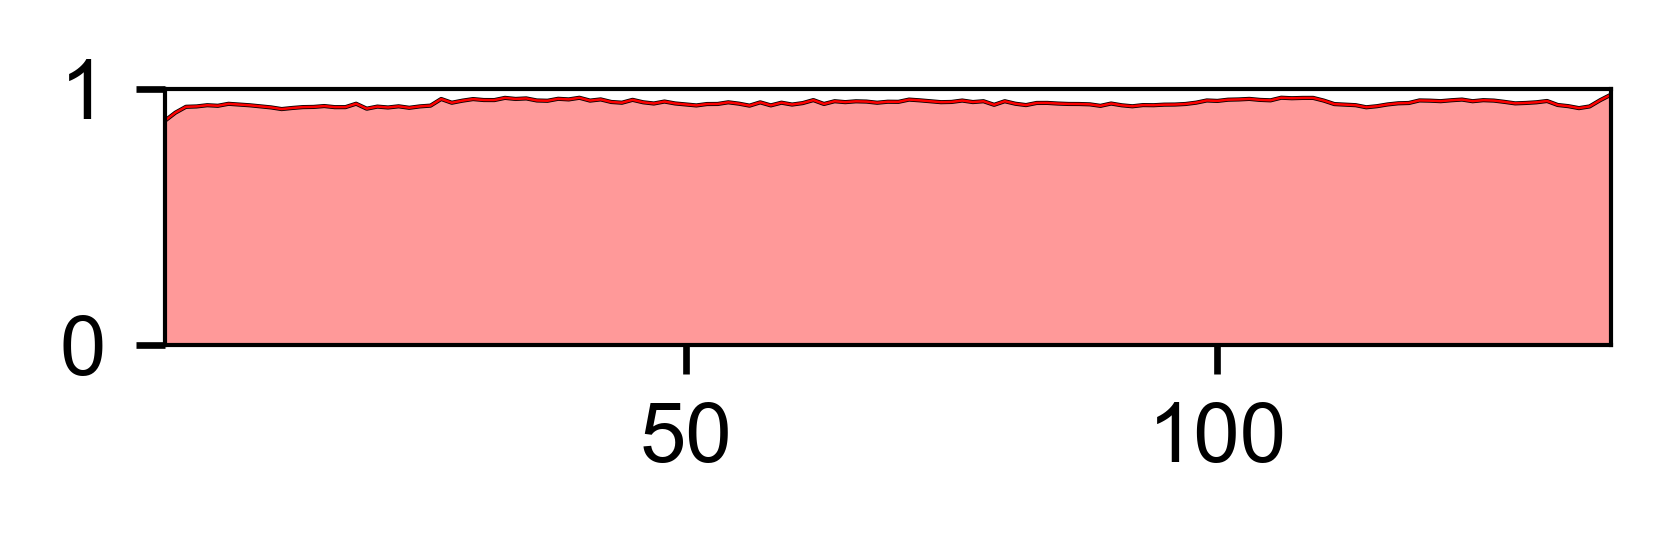

In [27]:
# 21 = initiatior methionine 
for k in seqs:
    plot_disorder(seq=seqs[k], outname=f'figures/pesce/{k}_{metapredict_version}.pdf')
